# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Data

In [ ]:
loan_data_inputs_train = pd.read_csv('/content/drive/MyDrive/Credit scoring_365/data_2/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('/content/drive/MyDrive/Credit scoring_365/data_2/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('/content/drive/MyDrive/Credit scoring_365/data_2/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('/content/drive/MyDrive/Credit scoring_365/data_2/loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [ ]:
loan_data_inputs_train.shape

(373028, 306)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
#n=1
#loan_data_targets_train.drop(loan_data_targets_train.tail(n).index,
        #inplace = True)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
loan_data_inputs_train.shape

(373028, 306)

In [ ]:
loan_data_inputs_train.head(3)

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,0,1,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,1,0,0,0,0,1,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
loan_data_inputs_test.shape

(93257, 306)

In [ ]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [ ]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , [
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57'

]
]

In [ ]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K']


In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg = LogisticRegression()

In [ ]:
pd.options.display.max_rows = None

In [ ]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
reg.intercept_

array([-0.77024162])

In [ ]:
reg.coef_

array([[ 1.18030447,  0.92610085,  0.72330549,  0.52531492,  0.33774825,
         0.14371709,  0.08956114,  0.10612742,  0.03498896,  0.08263018,
         0.05451779,  0.07534121,  0.08571262,  0.13447119,  0.10593073,
         0.18398666,  0.24187165,  0.2089226 ,  0.27294847,  0.31107216,
         0.50927414,  0.09447549, -0.00186682,  0.27595096,  0.17122159,
         0.20091577,  0.26671213,  0.05443815,  0.07977693,  0.10008829,
         0.12411995,  0.08599099,  0.05330371,  0.11516088,  1.07823471,
         0.87781636,  0.783686  ,  0.58616447,  0.41685265,  0.16873936,
        -0.06204851,  0.87383873,  0.54573949,  0.29390466,  0.10284406,
         0.04783362,  0.02535683,  0.06749928,  0.10989172,  0.12101179,
         0.076249  ,  0.05301848,  0.70886733,  0.57267942,  0.36351342,
         0.15224199, -0.00844022, -0.06923618, -0.09596386, -0.10527205,
        -0.07108868, -0.1659524 ,  0.2666898 ,  0.28758296, -0.03026186,
         0.01988735,  0.2563288 ,  0.04021981, -0.0

In [ ]:
feature_name = inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.770242
1,grade:A,1.180304
2,grade:B,0.926101
3,grade:C,0.723305
4,grade:D,0.525315
5,grade:E,0.337748
6,grade:F,0.143717
7,home_ownership:OWN,0.089561
8,home_ownership:MORTGAGE,0.106127
9,addr_state:NM_VA,0.034989


## Build a Logistic Regression Model with P-Values

In [ ]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values()

In [ ]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.770242
1,grade:A,1.180304
2,grade:B,0.926101
3,grade:C,0.723305
4,grade:D,0.525315
5,grade:E,0.337748
6,grade:F,0.143717
7,home_ownership:OWN,0.089561
8,home_ownership:MORTGAGE,0.106127
9,addr_state:NM_VA,0.034989


In [ ]:
p_values = reg.p_values

In [ ]:
p_values = np.append(np.nan, np.array(p_values))

In [ ]:
summary_table['p_values'] = p_values

In [ ]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.770242,NaN
1,grade:A,1.180304,6.941205e-39
2,grade:B,0.926101,3.813112e-52
3,grade:C,0.723305,1.966407e-37
4,grade:D,0.525315,1.492072e-22
5,grade:E,0.337748,2.284976e-12
6,grade:F,0.143717,4.195441e-03
7,home_ownership:OWN,0.089561,8.979368e-06
8,home_ownership:MORTGAGE,0.106127,5.803149e-17
9,addr_state:NM_VA,0.034989,2.753018e-01


In [ ]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , [
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57']]

In [ ]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
#'dti:>35',
'mths_since_last_delinq:0-3']
#'mths_since_last_record:0-2']

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
feature_name = inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.025252
1,grade:A,1.175232
2,grade:B,0.919453
3,grade:C,0.720794
4,grade:D,0.526317
5,grade:E,0.341748
6,grade:F,0.149239
7,home_ownership:OWN,0.087127
8,home_ownership:MORTGAGE,0.100055
9,addr_state:NM_VA,0.035844


In [ ]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.025252,NaN
1,grade:A,1.175232,7.503117e-39
2,grade:B,0.919453,2.892752e-52
3,grade:C,0.720794,4.732901e-38
4,grade:D,0.526317,2.374489e-23
5,grade:E,0.341748,2.395530e-13
6,grade:F,0.149239,2.067309e-03
7,home_ownership:OWN,0.087127,1.494519e-05
8,home_ownership:MORTGAGE,0.100055,2.189517e-15
9,addr_state:NM_VA,0.035844,2.623869e-01


In [ ]:
import pickle

In [ ]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

In [ ]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57']]

In [ ]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
#'dti:>35',
'mths_since_last_delinq:0-3']
#'mths_since_last_record:0-2']

In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y_hat_test = reg2.model.predict(inputs_test)

In [ ]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [ ]:
y_hat_test_proba[: ][: , 1]

array([0.91578698, 0.84828321, 0.88876828, ..., 0.97150781, 0.95659189,
       0.95585343])

In [ ]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [ ]:
loan_data_targets_test_temp = loan_data_targets_test

In [ ]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [ ]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [ ]:
df_actual_predicted_probs.shape

(93257, 2)

In [ ]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [ ]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [ ]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.915787
288564,1,0.848283
213591,1,0.888768
263083,1,0.942235
165001,1,0.964404


In [ ]:
tr=0.9
df_actual_predicted_probs['y_hat_test']=np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [ ]:
pd.crosstab(df_actual_predicted_probs[
            'loan_data_targets_test'],\
            df_actual_predicted_probs['y_hat_test'],\
             rownames=['actual'],\
            colnames=['predicted'])

predicted,0,1
actual,,
0,7360,2830
1,36205,46862


out of 9990 observations  

7360 are correcly classiferd as 'bad'

out of 83065 observations

46862 are correctly classfied as 'good'

In [ ]:
#but how to minmize but still want give loans?


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs[
            'loan_data_targets_test'],\
            df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'Roc curve')

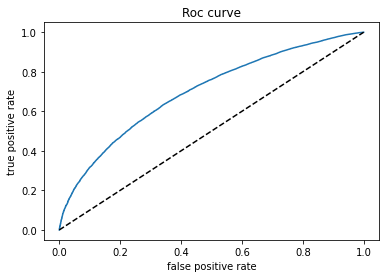

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Roc curve')


In [ ]:
ROCH=roc_auc_score(df_actual_predicted_probs[
            'loan_data_targets_test'],\
            df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
ROCH

0.6990425649640234

#Gini and colmogorove  Smirnove

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [ ]:
df_actual_predicted_probs=df_actual_predicted_probs.reset_index()

In [ ]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,39810,0,0.425046,0
1,42341,1,0.433600,0
2,40518,0,0.455340,0
3,40242,0,0.458278,0
4,12074,0,0.477589,0


In [ ]:
#cummulative % of total populations?
#cummulative % of good borrowers?
#cummulative % of bad borrowers?

In [ ]:
df_actual_predicted_probs['Cummunlative N population']=df_actual_predicted_probs.index +1
df_actual_predicted_probs['Cummunlative N good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cummulative N bad'] = df_actual_predicted_probs['Cummunlative N population'] -df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [ ]:
df_actual_predicted_probs['Cummulative perc of Population']=df_actual_predicted_probs['Cummunlative N population']/(df_actual_predicted_probs.shape[0])

In [ ]:
df_actual_predicted_probs['Cummulative perc good']=\
df_actual_predicted_probs['Cummunlative N good']/df_actual_predicted_probs['loan_data_targets_test'].sum()

In [ ]:
df_actual_predicted_probs['Cummulative perc bad']=\
df_actual_predicted_probs['Cummulative N bad']/(df_actual_predicted_probs.shape[0]-df_actual_predicted_probs['loan_data_targets_test'].sum())

In [ ]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cummunlative N population,Cummunlative N good,Cummulative N bad,Cummulative perc of Population,Cummulative perc good,Cummulative perc bad
0,39810,0,0.425046,0,1,0,1,0.000011,0.000000,0.000098
1,42341,1,0.433600,0,2,1,1,0.000021,0.000012,0.000098
2,40518,0,0.455340,0,3,1,2,0.000032,0.000012,0.000196
3,40242,0,0.458278,0,4,1,3,0.000043,0.000012,0.000294
4,12074,0,0.477589,0,5,1,4,0.000054,0.000012,0.000393


Text(0.5, 1.0, 'Gini')

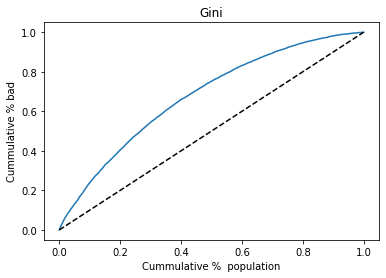

In [ ]:

plt.plot(df_actual_predicted_probs['Cummulative perc of Population'],df_actual_predicted_probs['Cummulative perc bad'])
plt.plot(df_actual_predicted_probs['Cummulative perc of Population'],\
         df_actual_predicted_probs['Cummulative perc of Population'],linestyle = '--',color='k')
plt.xlabel('Cummulative %  population')
plt.ylabel('Cummulative % bad')
plt.title('Gini')

In [ ]:
# gini and roc?
#gini= roc*2-1
gini=ROCH*2-1
gini

0.3980851299280468

Text(0.5, 1.0, 'Kolmogrov-Simirov')

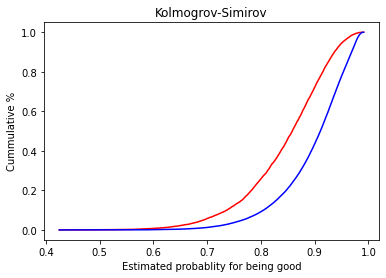

In [ ]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cummulative perc bad'],
         color= 'r'
         )
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cummulative perc good'],
        color='b' 
         )
plt.xlabel('Estimated probablity for being good')
plt.ylabel('Cummulative %')
plt.title('Kolmogrov-Simirov')

In [ ]:
KS=max(df_actual_predicted_probs['Cummulative perc bad']-df_actual_predicted_probs['Cummulative perc good'])

In [ ]:
KS

0.2918577142518047

even if KS value is 2.9 we can say that thair is a clear distance between two lines so the model has Satisfactory predictive power.)

#Applaying the model

#building score card

In [ ]:
pd.options.display.max_columns=None

In [ ]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.025252,NaN
1,grade:A,1.175232,7.503117e-39
2,grade:B,0.919453,2.892752e-52
3,grade:C,0.720794,4.732901e-38
4,grade:D,0.526317,2.374489e-23
5,grade:E,0.341748,2.395530e-13
6,grade:F,0.149239,2.067309e-03
7,home_ownership:OWN,0.087127,1.494519e-05
8,home_ownership:MORTGAGE,0.100055,2.189517e-15
9,addr_state:NM_VA,0.035844,2.623869e-01


In [ ]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df_ref_categories=pd.DataFrame(ref_categories,columns=['Feature name'])
df_ref_categories['Coefficients']=0
df_ref_categories['p_values']=np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [ ]:
df_scorecard=pd.concat([summary_table,df_ref_categories])
df_scorecard.reset_index
df_scorecard

,Feature name,Coefficients,p_values
0,Intercept,-1.025252,NaN
1,grade:A,1.175232,7.503117e-39
2,grade:B,0.919453,2.892752e-52
3,grade:C,0.720794,4.732901e-38
4,grade:D,0.526317,2.374489e-23
5,grade:E,0.341748,2.395530e-13
6,grade:F,0.149239,2.067309e-03
7,home_ownership:OWN,0.087127,1.494519e-05
8,home_ownership:MORTGAGE,0.100055,2.189517e-15
9,addr_state:NM_VA,0.035844,2.623869e-01


In [ ]:
df_scorecard['Original feature name']=df_scorecard['Feature name'].str.split(':').str[0]

In [ ]:
df_scorecard

,Feature name,Coefficients,p_values,Original feature name
0,Intercept,-1.025252,NaN,Intercept
1,grade:A,1.175232,7.503117e-39,grade
2,grade:B,0.919453,2.892752e-52,grade
3,grade:C,0.720794,4.732901e-38,grade
4,grade:D,0.526317,2.374489e-23,grade
5,grade:E,0.341748,2.395530e-13,grade
6,grade:F,0.149239,2.067309e-03,grade
7,home_ownership:OWN,0.087127,1.494519e-05,home_ownership
8,home_ownership:MORTGAGE,0.100055,2.189517e-15,home_ownership
9,addr_state:NM_VA,0.035844,2.623869e-01,addr_state


In [ ]:
min_score=300
max_score=850

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.025252
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.080626
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071513
mths_since_last_delinq         0.000000
purpose                        0.000000
term                           0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [ ]:
min_sum_coef=df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.1773907866036954

In [ ]:
max_sum_coef=df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.328178238309318

In [ ]:
#calculating score
df_scorecard['score calculation']=df_scorecard['Coefficients']*(max_score-min_score)/(max_sum_coef-min_sum_coef)
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,score calculation
0,Intercept,-1.025252,NaN,Intercept,-86.677809
1,grade:A,1.175232,7.503117e-39,grade,99.357607
2,grade:B,0.919453,2.892752e-52,grade,77.733277
3,grade:C,0.720794,4.732901e-38,grade,60.938079
4,grade:D,0.526317,2.374489e-23,grade,44.496360
5,grade:E,0.341748,2.395530e-13,grade,28.892414
6,grade:F,0.149239,2.067309e-03,grade,12.617068
7,home_ownership:OWN,0.087127,1.494519e-05,home_ownership,7.365996
8,home_ownership:MORTGAGE,0.100055,2.189517e-15,home_ownership,8.458964
9,addr_state:NM_VA,0.035844,2.623869e-01,addr_state,3.030333


In [ ]:
df_scorecard['score calculation'][0]=(df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef)*(max_score-min_score)+min_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_scorecard['score Preliminary']=df_scorecard['score calculation'].round()

In [ ]:
df_scorecard   

,Feature name,Coefficients,p_values,Original feature name,score calculation,score Preliminary
0,Intercept,-1.025252,NaN,Intercept,312.862282,313.0
1,grade:A,1.175232,7.503117e-39,grade,99.357607,99.0
2,grade:B,0.919453,2.892752e-52,grade,77.733277,78.0
3,grade:C,0.720794,4.732901e-38,grade,60.938079,61.0
4,grade:D,0.526317,2.374489e-23,grade,44.496360,44.0
5,grade:E,0.341748,2.395530e-13,grade,28.892414,29.0
6,grade:F,0.149239,2.067309e-03,grade,12.617068,13.0
7,home_ownership:OWN,0.087127,1.494519e-05,home_ownership,7.365996,7.0
8,home_ownership:MORTGAGE,0.100055,2.189517e-15,home_ownership,8.458964,8.0
9,addr_state:NM_VA,0.035844,2.623869e-01,addr_state,3.030333,3.0


In [ ]:
max_sum_score_prel= df_scorecard.groupby('Original feature name')['score Preliminary'].max().sum()
max_sum_score_prel

1150.0

#Calculating creadit score

In [ ]:
inputs_test_with_ref_cat.head(2)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,score calculation,score Preliminary
0,Intercept,-1.025252,NaN,Intercept,312.862282,313.0
1,grade:A,1.175232,7.503117e-39,grade,99.357607,99.0
2,grade:B,0.919453,2.892752e-52,grade,77.733277,78.0
3,grade:C,0.720794,4.732901e-38,grade,60.938079,61.0
4,grade:D,0.526317,2.374489e-23,grade,44.496360,44.0
5,grade:E,0.341748,2.395530e-13,grade,28.892414,29.0
6,grade:F,0.149239,2.067309e-03,grade,12.617068,13.0
7,home_ownership:OWN,0.087127,1.494519e-05,home_ownership,7.365996,7.0
8,home_ownership:MORTGAGE,0.100055,2.189517e-15,home_ownership,8.458964,8.0
9,addr_state:NM_VA,0.035844,2.623869e-01,addr_state,3.030333,3.0


In [ ]:
inputs_test_with_ref_cat_w_intercept=inputs_test_with_ref_cat

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)

In [ ]:
inputs_test_with_ref_cat_w_intercept=inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [ ]:
scored_scores=df_scorecard['score Preliminary']

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 85)

In [ ]:
scored_scores.shape

(85,)

In [ ]:
scored_scores=scored_scores.values.reshape(85,1)

In [ ]:
scored_scores.shape

(85, 1)

In [ ]:
y_scores=inputs_test_with_ref_cat_w_intercept.dot(scored_scores)

In [ ]:
y_scores.head()

,0
362514,602.0
288564,546.0
213591,575.0
263083,636.0
165001,678.0


#from credit score to pd

In [ ]:
sum_coef_from_score=((y_scores-min_score)/(max_score-min_score))*(max_sum_coef-min_sum_coef) + min_sum_coef

In [ ]:
y_hat_proba_score=np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score) + 1)

In [ ]:
y_hat_proba_score.head()

,0
362514,0.916427
288564,0.849716
213591,0.888488
263083,0.942509
165001,0.964212


In [ ]:
thresholds

array([1.99104415, 0.99104415, 0.98901455, ..., 0.45533953, 0.43359985,
       0.42504605])

In [ ]:
thresholds.shape

(17981,)

In [ ]:
df_cuttofs=pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)],axis=1)

In [ ]:
df_cuttofs.columns=['thresholds','fpr','tpr']
df_cuttofs.head()

,thresholds,fpr,tpr
0,1.991044,0.000000,0.000000
1,0.991044,0.000000,0.000012
2,0.989015,0.000000,0.000385
3,0.988994,0.000098,0.000385
4,0.987191,0.000098,0.002083


In [ ]:
df_cuttofs['thresholds'][0]=1-1/np.power(10,16)

In [ ]:
df_cuttofs['scores']=((np.log(df_cuttofs['thresholds']/(1-df_cuttofs['thresholds'])) -min_sum_coef) *((max_score-min_score)/(max_sum_coef-min_sum_coef))+ min_score).round()

In [ ]:
df_cuttofs['scores'][0]=max_score

In [ ]:
df_cuttofs.head()

,thresholds,fpr,tpr,scores
0,1.000000,0.000000,0.000000,850.0
1,0.991044,0.000000,0.000012,797.0
2,0.989015,0.000000,0.000385,780.0
3,0.988994,0.000098,0.000385,780.0
4,0.987191,0.000098,0.002083,767.0


In [ ]:
def n_approved(p):
  return np.where(df_actual_predicted_probs['y_hat_test_proba']>=p,1,0).sum()

In [ ]:
df_cuttofs['N approved']=df_cuttofs['thresholds'].apply(n_approved)
df_cuttofs['N rejected']=df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cuttofs['N approved']
df_cuttofs['N approved rate']= df_cuttofs['N approved']/df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cuttofs['N rejection rate']= 1- df_cuttofs['N approved rate']

In [ ]:
df_cuttofs.head()

,thresholds,fpr,tpr,scores,N approved,N rejected,N approved rate,N rejection rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.991044,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.989015,0.000000,0.000385,780.0,32,93225,0.000343,0.999657
3,0.988994,0.000098,0.000385,780.0,33,93224,0.000354,0.999646
4,0.987191,0.000098,0.002083,767.0,174,93083,0.001866,0.998134


In [ ]:
df_cuttofs.tail()

,thresholds,fpr,tpr,scores,N approved,N rejected,N approved rate,N rejection rate
17976,0.489293,0.999509,0.999952,396.0,93248,9,0.999903,0.000097
17977,0.483625,0.999509,0.999988,394.0,93251,6,0.999936,0.000064
17978,0.455340,0.999902,0.999988,384.0,93255,2,0.999979,0.000021
17979,0.433600,0.999902,1.000000,377.0,93256,1,0.999989,0.000011
17980,0.425046,1.000000,1.000000,374.0,93257,0,1.000000,0.000000


In [ ]:
inputs_test_with_ref_cat.to_csv('inputs_test_with_ref_cat.csv')
df_scorecard.to_csv('df_scorecard.csv')